In [62]:
#Import the Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,r2_score,precision_score,classification_report,confusion_matrix,recall_score,f1_score
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree,DecisionTreeClassifier

In [35]:
#Load the data sets- train and test 
df=pd.read_csv('train.csv')


In [6]:
#Look at top values of train data 
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
#Print the column names of train data
df.columns.to_list()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [8]:
#Print the dimension of train and test data
rows,cols=df.shape
print(f"{rows}X{cols}")

891X12


In [9]:
#Print the number of missing values in each column of train and test data
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

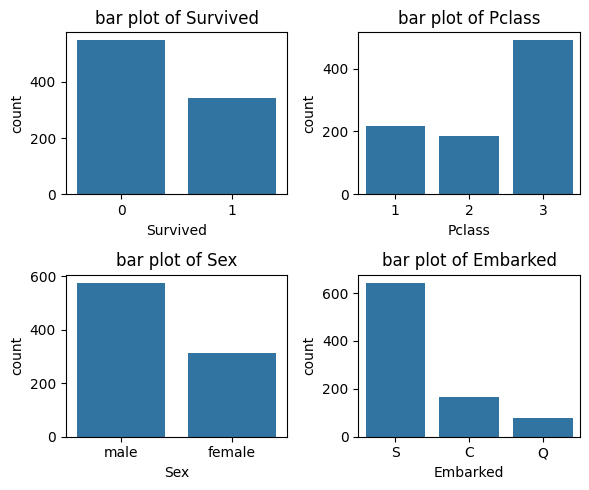

In [13]:
#Barchart of Survived, Pclass, Sex, Embarked
cols=["Survived","Pclass","Sex","Embarked"]
fig,axes=plt.subplots(2,2,figsize=(6,5))
axes=axes.flatten()
for i,col in enumerate(cols):
    cur_ax=axes[i]
    sns.countplot(data=df,x=col,ax=cur_ax)
    cur_ax.set_title(f"bar plot of {col}")
plt.tight_layout()
plt.show()

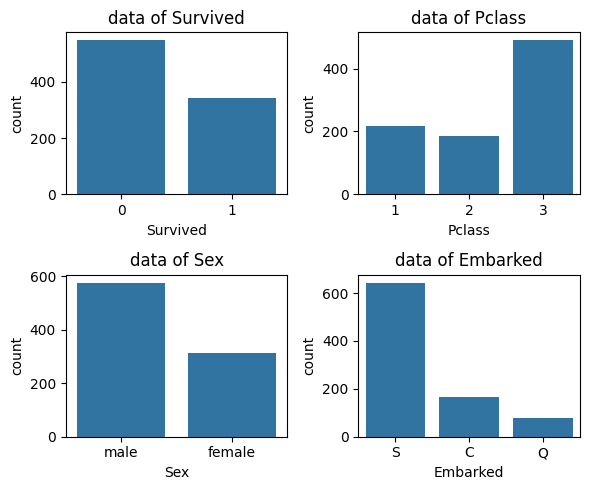

In [18]:
# using same bar plot instead of count plot
fig,axes=plt.subplots(2,2,figsize=(6,5))
axes=axes.flatten()
for i,col in enumerate(cols):
    cur_ax=axes[i]
    new_count_df=df[col].value_counts().reset_index()
    sns.barplot(data=new_count_df,x=col,y="count",ax=cur_ax)
    cur_ax.set_title(f"data of {col}")
plt.tight_layout()
plt.show()


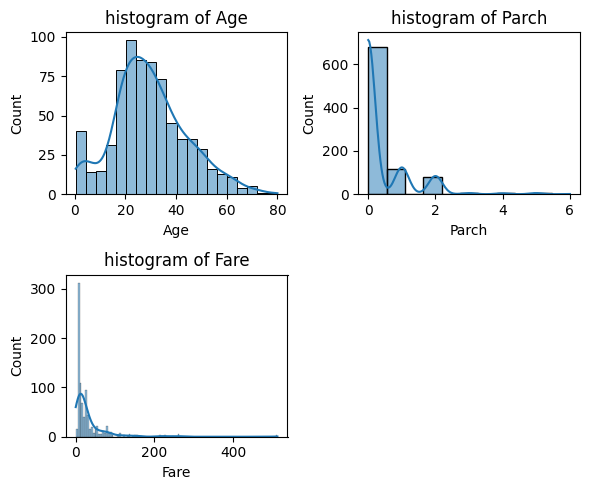

In [23]:
#Histogram of Age, Parch, Fare
cols=["Age","Parch","Fare"]
fig,axes=plt.subplots(2,2,figsize=(6,5))
axes=axes.flatten()
for i,col in enumerate(cols):
    cur_ax=axes[i]
    sns.histplot(df[col],kde=True,ax=cur_ax)
    cur_ax.set_title(f"histogram of {col}")
plt.delaxes(axes[-1])
plt.tight_layout()
plt.show()

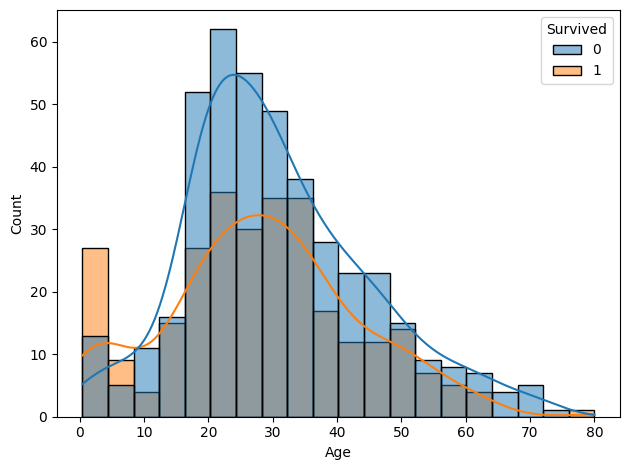

In [29]:
#Plot histogram of age for survived and did not survived class
sns.histplot(data=df,x='Age',kde=True,hue="Survived")
plt.tight_layout()
plt.show()

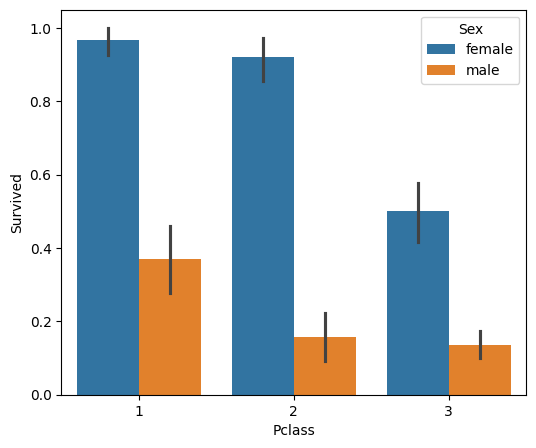

In [34]:
#Count class and gender wise survival rate - plot with appropriate chart
plt.figure(figsize=(6,5))
sns.barplot(data=df,x="Pclass",y="Survived",hue="Sex")
plt.show()

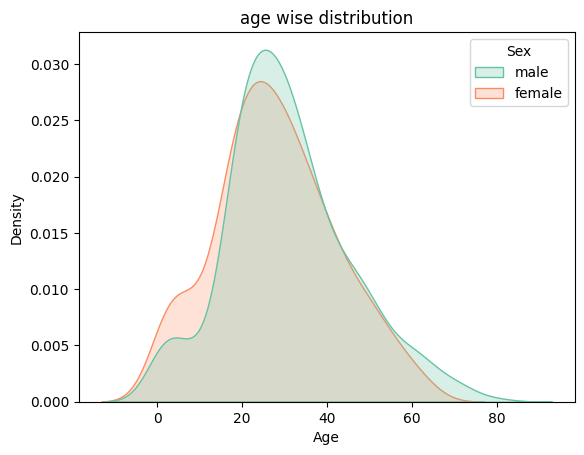

In [10]:
#Age wise Distribution of Male and Female passengers


# one way using: KDE plot
sns.kdeplot(data=df,x="Age",hue="Sex",palette="Set2",common_norm=False,fill=True)
plt.title("age wise distribution")
plt.show()

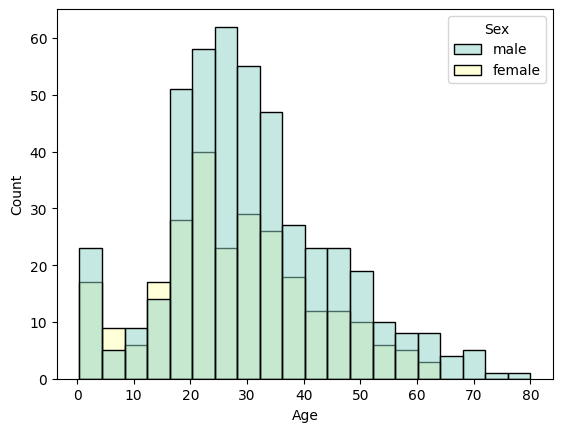

In [46]:


#Age wise Distribution of Male and Female passengers



# another way using : Histogram plot
sns.histplot(data=df,x="Age",hue="Sex",palette="Set3")
plt.show()

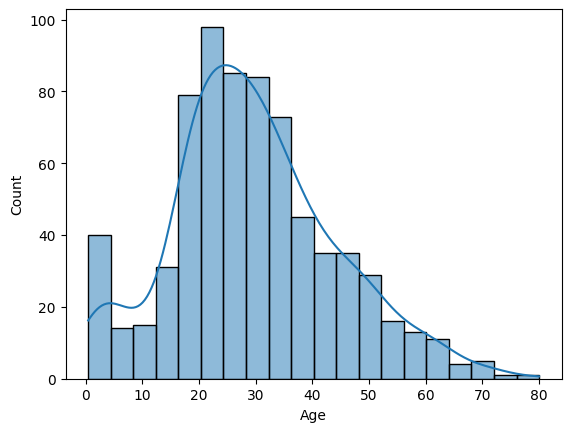

In [48]:
#Histogram of Age of the given data set(sample)
sns.histplot(data=df,x="Age",kde=True)
plt.show()

In [49]:


df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [51]:
df.fillna({"Embarked":"S"},inplace=True)

In [52]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [54]:
#Impute the missing values in Fare column with median value
df.fillna({"Fare":df['Fare'].median()},inplace=True)

In [55]:


df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [16]:


#Impute the Age column. It has too many missing values but it may be important. 
#We fill the missing values with numbers randomly drawn from distribution
#that has same mean and standard deviation as non missing Age data
mean_age=df['Age'].mean()
std_age=df['Age'].std()
print(mean_age,std_age)
def fill_missing(x):
    if pd.isnull(x):
        return np.random.normal(mean_age,std_age)
    return x
df["Age"]=df["Age"].apply(fill_missing)
mean_age=df['Age'].mean()
std_age=df['Age'].std()
print(mean_age,std_age)

29.27810732436955 14.48304176708626
29.27810732436955 14.48304176708626


In [17]:
# Create and add a new feature FamilySize as a combination of SibSp and Parch
#FamilySize = Parch + SibSp + 1
df["FamilySize"]=df["Parch"]+df["SibSp"]+1
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [18]:
# Create new feature IsAlone from FamilySize
#If FamilySize == 1 then IsAlone = True else IsAlone = False
df["IsAlone"]=df["FamilySize"]==1
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,False
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,True


In [25]:
#if Cabin == NaN the Has_cabin = False else Has_cabin = True
df["Has_cabin"]=df["Cabin"].notna()
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone,Has_cabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,False,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,False,True
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,True,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,False,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,True,False


In [26]:


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  FamilySize   891 non-null    int64  
 13  IsAlone      891 non-null    bool   
 14  Has_cabin    891 non-null    bool   
dtypes: bool(2), float64(2), int64(6), object(5)
memory usage: 92.4+ KB


In [36]:
#Drop the columns which may not be useful in prediction of survival
#Drop PassengerId, Name, Ticket, and Cabin
df.drop(columns=["PassengerId","Name","Ticket","Cabin"],inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [38]:


#Prepare X and y
x=df.drop(columns=["Survived"])
y=df["Survived"]
x.head(),y.head()

(   Pclass     Sex   Age  SibSp  Parch     Fare Embarked
 0       3    male  22.0      1      0   7.2500        S
 1       1  female  38.0      1      0  71.2833        C
 2       3  female  26.0      0      0   7.9250        S
 3       1  female  35.0      1      0  53.1000        S
 4       3    male  35.0      0      0   8.0500        S,
 0    0
 1    1
 2    1
 3    1
 4    0
 Name: Survived, dtype: int64)

In [39]:
# Label encoding of categorical features
cat_cols=df.select_dtypes(include="object").columns
for col in cat_cols:
    encoder=LabelEncoder()
    x[col]=encoder.fit_transform(df[col])

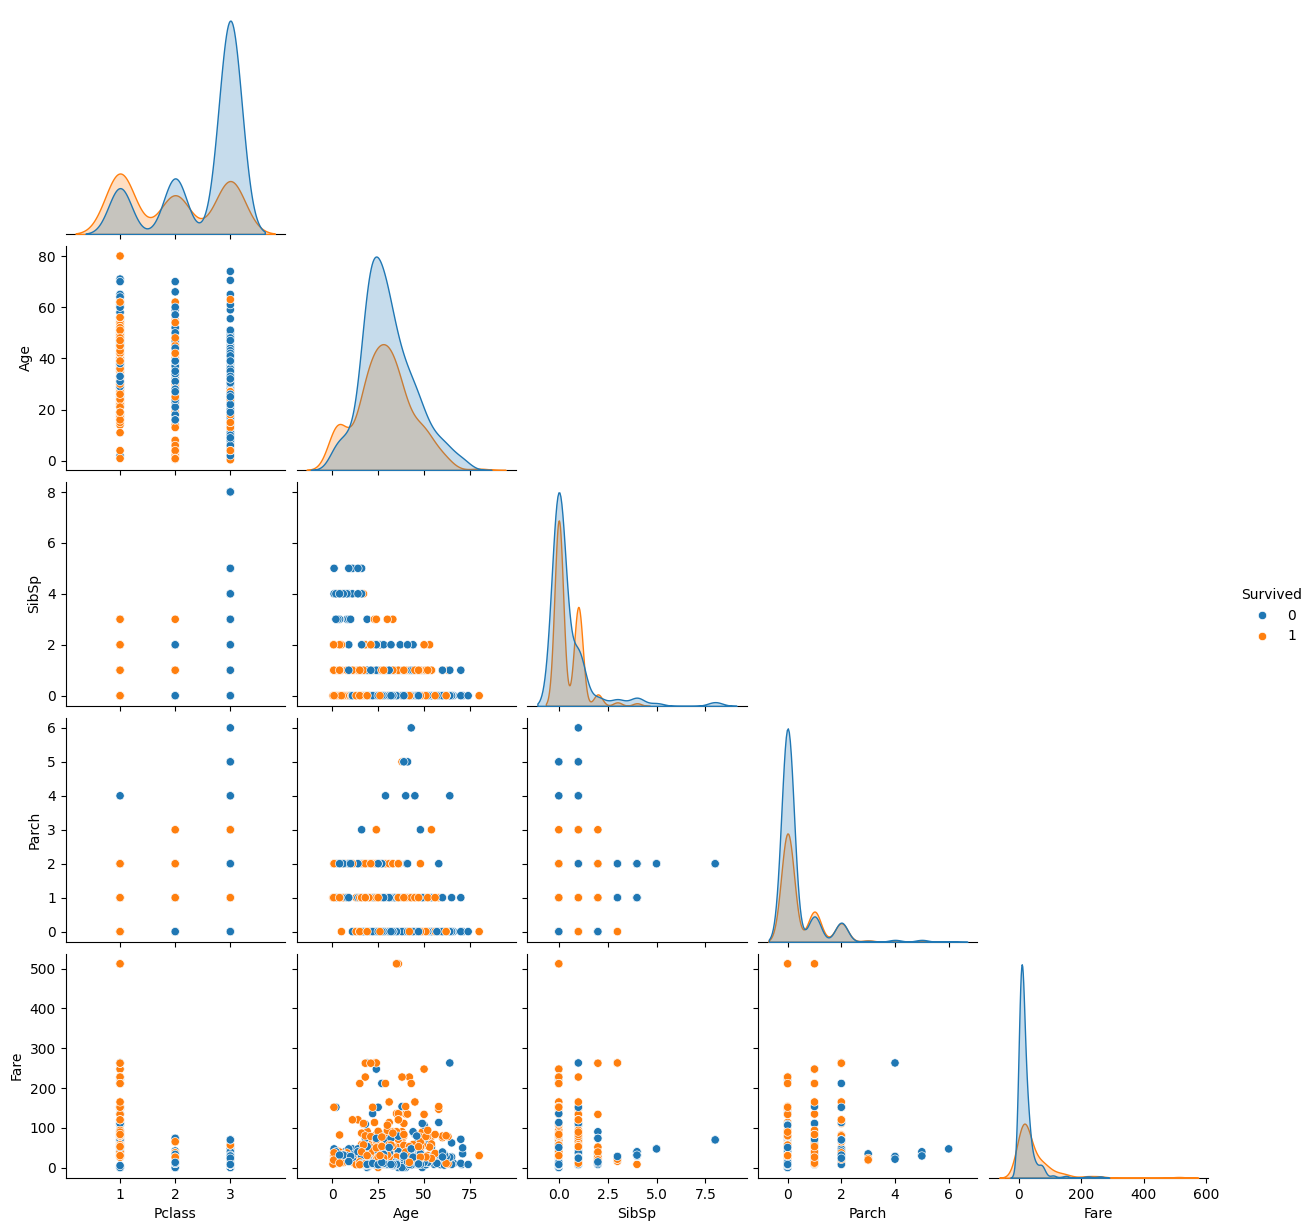

In [43]:
sns.pairplot(df,hue="Survived",corner=True)
plt.show()

In [48]:
# Splitting the data into train and validation set - 90% train 10% validation
#X_train, X_test, y_train, y_validation

x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.9,random_state=42)
print(x_train.shape)
x_test.shape

(801, 7)


(90, 7)

In [49]:


# Create the model
# Fitting the decision tree with default hyperparameters
# Importing decision tree classifier from sklearn library
model=DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

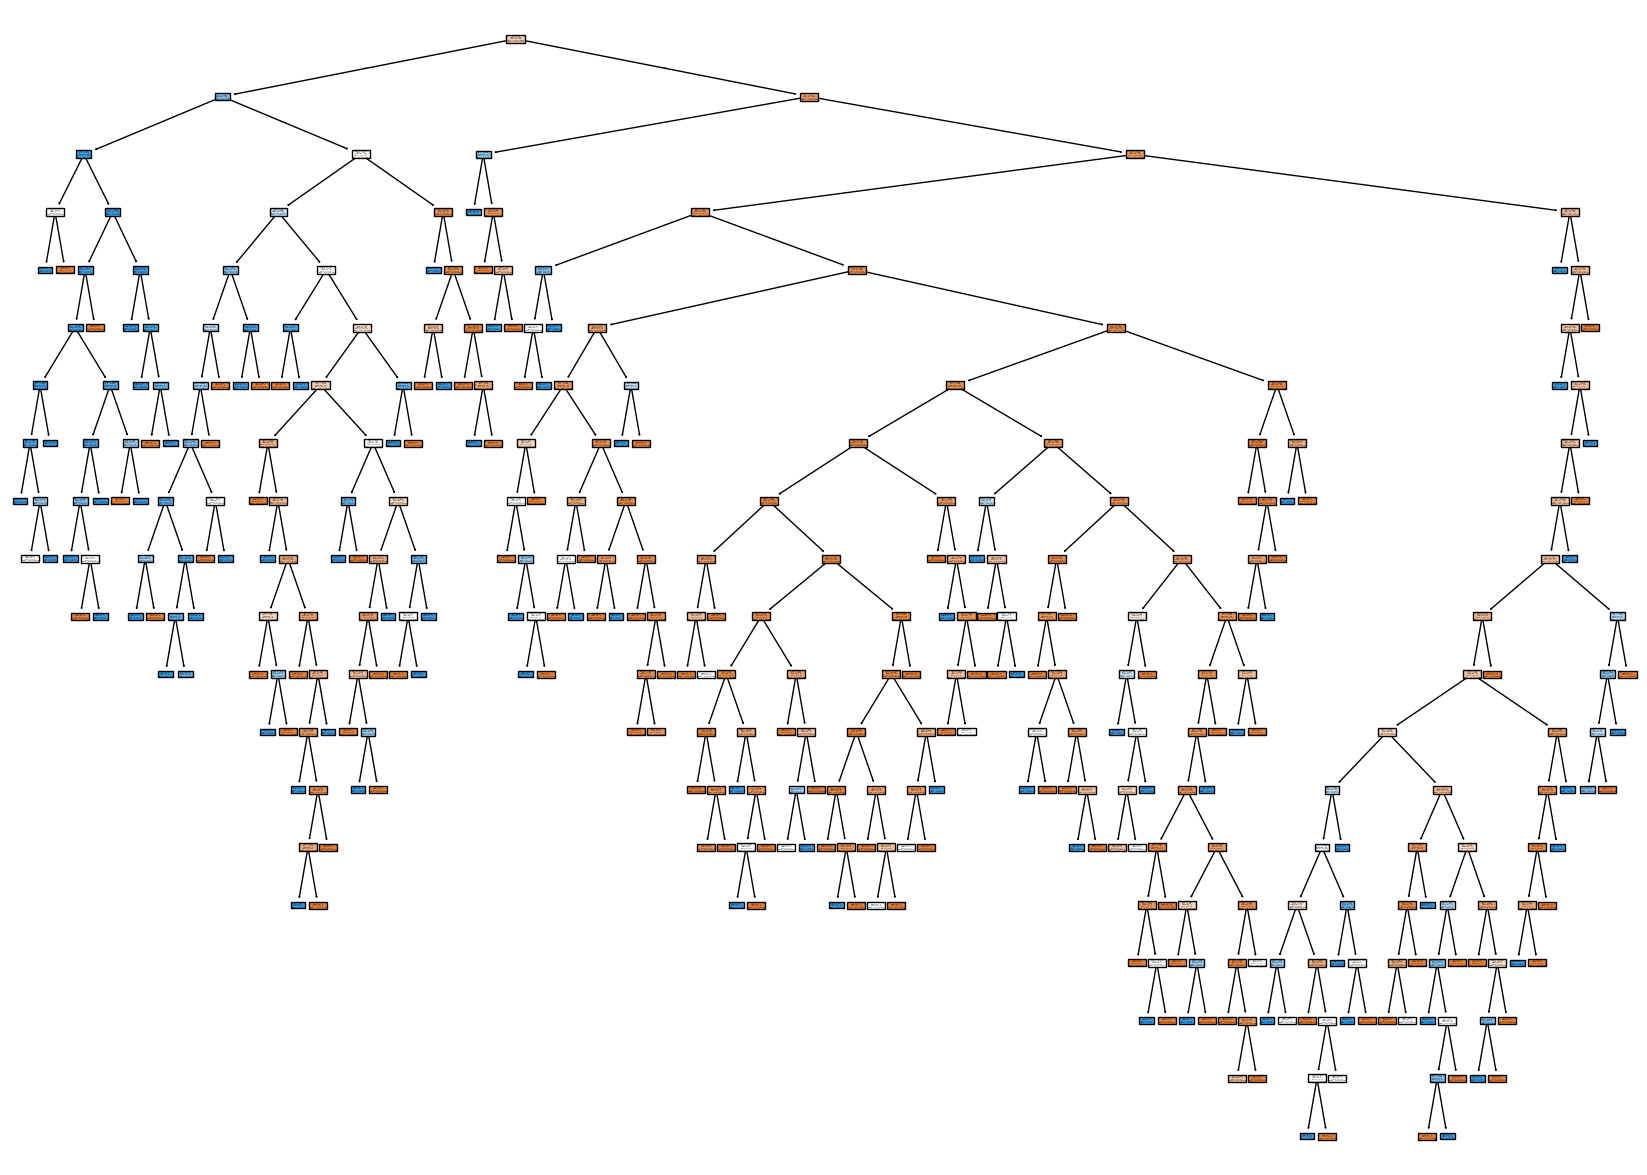

In [51]:


#Print the tree

# Importing required packages for visualization
plt.figure(figsize=(21,15))
plot_tree(model,feature_names=x.columns,class_names=["Not Survived","Survived"],filled=True)
plt.show()

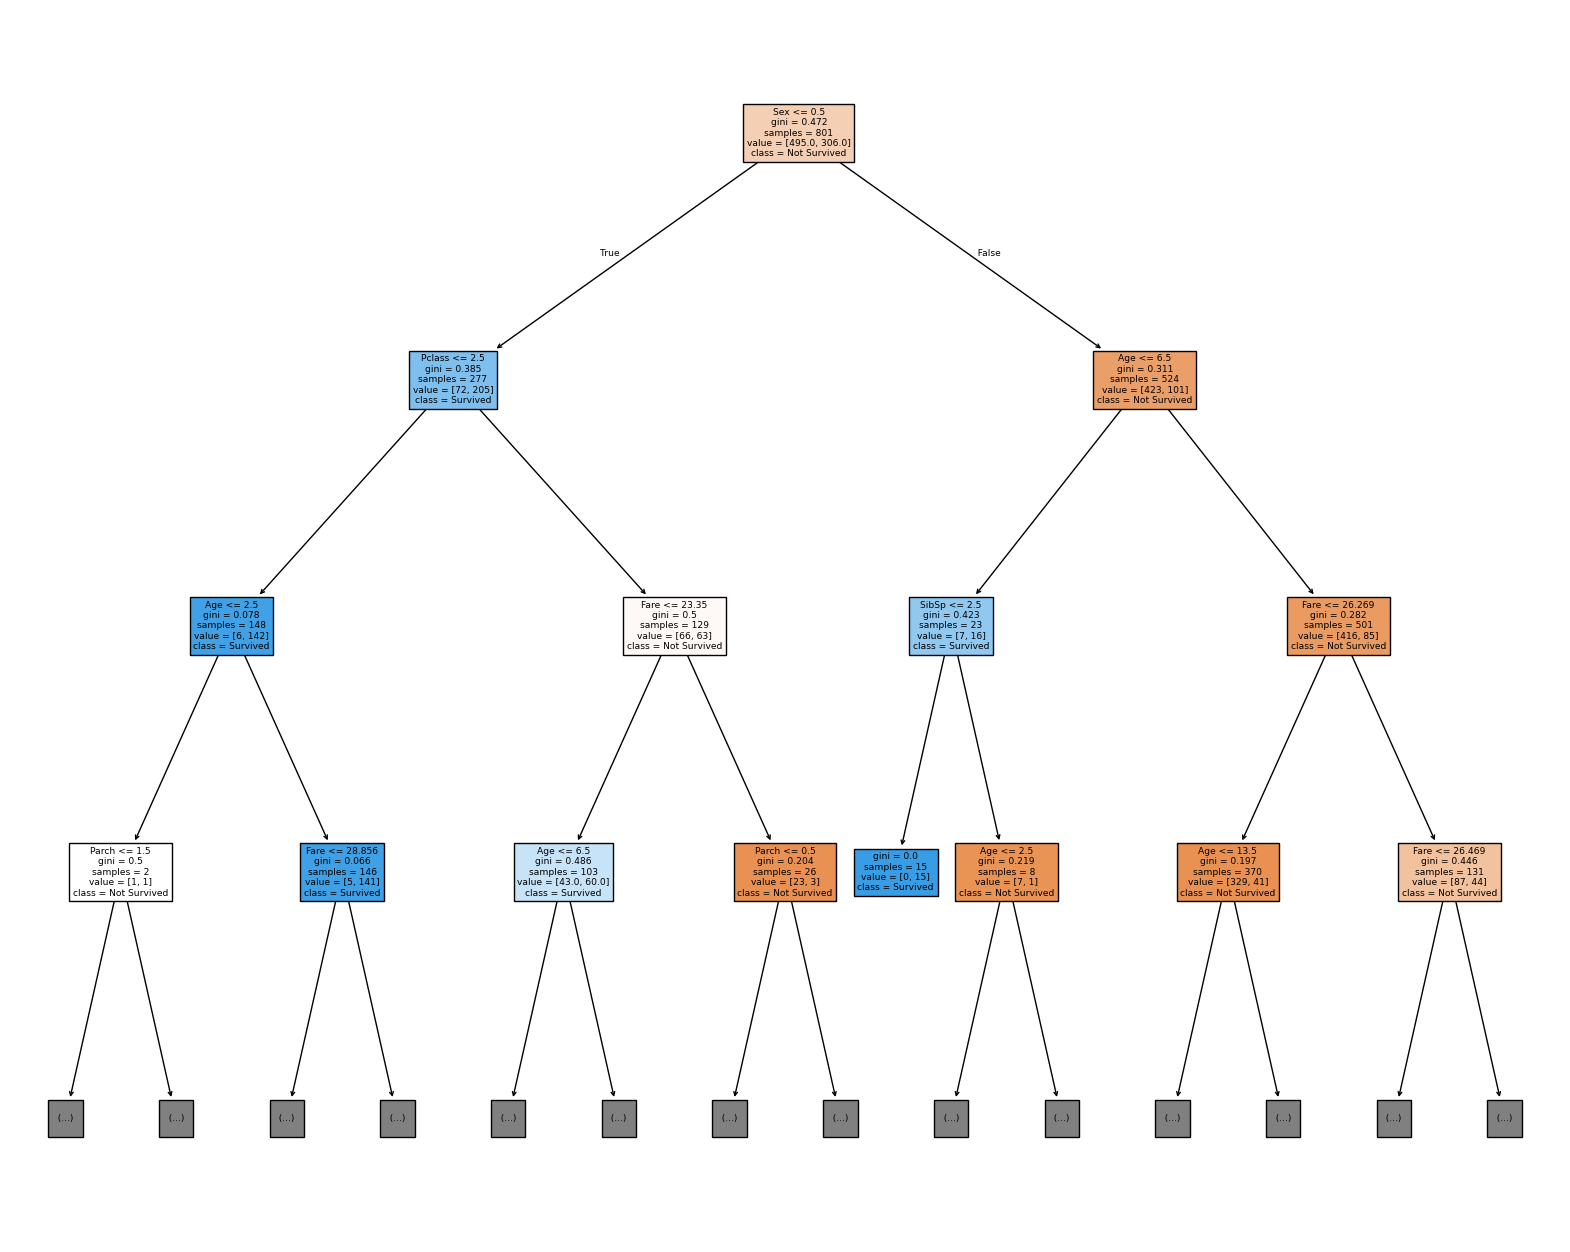

In [52]:


# plotting tree with max_depth=3
plt.figure(figsize=(20,16))
plot_tree(model,feature_names=x.columns,class_names=["Not Survived","Survived"],filled=True,max_depth=3)
plt.show()

In [65]:


# Check the evaluation metrics of our default model on validation set - Confusion Matrix, Accuracy, Precision, Recall, F1 score

# Importing classification report and confusion matrix from sklearn metrics

# Making predictions

# Printing classification report

y_pred=model.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(f1_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.8111111111111111
0.7317073170731707
0.8333333333333334
0.7792207792207793
              precision    recall  f1-score   support

           0       0.88      0.80      0.83        54
           1       0.73      0.83      0.78        36

    accuracy                           0.81        90
   macro avg       0.80      0.81      0.81        90
weighted avg       0.82      0.81      0.81        90



In [67]:
# Printing confusion matrix and accuracy
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))# Printing confusion matrix and accuracy

[[43 11]
 [ 6 30]]
0.8111111111111111
